<a href="https://colab.research.google.com/github/idrisoracleng/DataScience/blob/main/pandas_matplotlib/session2/10-minutes-to-pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

http://pandas.pydata.org/pandas-docs/stable/10min.html

# 10 Minutes to pandas

This is a short introduction to pandas, geared mainly for new users. You can see more complex recipes in the [Cookbook](http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook)

Customarily, we import as follows:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

## Object Creation

See the [Data Structure Intro section](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dsintro)

Creating a Series by passing a list of values, letting pandas create a default integer index:

In [4]:
s = pd.Series([1,3,5,np.nan,6,8])

In [5]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a DataFrame by passing a numpy array, with a datetime index and labeled columns:

In [6]:
dates = pd.date_range('20130101', periods=6)

In [7]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [8]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

In [9]:
df

,A,B,C,D
2013-01-01,-1.933249,-0.568715,1.254401,-0.554700
2013-01-02,-1.519713,-0.285232,-0.691573,-0.813003
2013-01-03,-1.463407,-1.253212,-0.508223,-0.975684
2013-01-04,0.900229,-1.568152,0.161843,0.588922
2013-01-05,-0.167320,2.111336,-0.719625,-0.522362
2013-01-06,0.721232,-0.207845,1.325525,0.535333


Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [10]:
df2 = pd.DataFrame({'A':1.,
                   'B':pd.Timestamp('20130102'),
                   'C':pd.Series(1,index=list(range(4)),dtype='float32'),
                   'D':np.array([3]*4,dtype='int32'),
                   'E':pd.Categorical(["test","train","test","train"]),
                   'F':'foo'})

In [11]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


Having specific [dtypes](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-dtypes)

In [12]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

Tab completion for column names (as well as public attributes) is automatically enabled. Here’s a subset of the attributes that will be completed:

In [13]:
# df2.<TAB>

As you can see, the columns A, B, C, and D are automatically tab completed. E is there as well; the rest of the attributes have been truncated for brevity.

## Viewing Data

See the [Basics section](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics)

See the top & bottom rows of the frame

In [14]:
df.head()

,A,B,C,D
2013-01-01,-1.933249,-0.568715,1.254401,-0.554700
2013-01-02,-1.519713,-0.285232,-0.691573,-0.813003
2013-01-03,-1.463407,-1.253212,-0.508223,-0.975684
2013-01-04,0.900229,-1.568152,0.161843,0.588922
2013-01-05,-0.167320,2.111336,-0.719625,-0.522362


In [15]:
df.tail(3)

,A,B,C,D
2013-01-04,0.900229,-1.568152,0.161843,0.588922
2013-01-05,-0.167320,2.111336,-0.719625,-0.522362
2013-01-06,0.721232,-0.207845,1.325525,0.535333


Display the index, columns, and the underlying numpy data

In [16]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [17]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [18]:
df.values

array([[-1.93324879, -0.56871462,  1.25440083, -0.55469987],
       [-1.51971281, -0.28523176, -0.69157304, -0.81300297],
       [-1.46340682, -1.25321212, -0.50822264, -0.97568368],
       [ 0.90022873, -1.56815206,  0.16184338,  0.58892184],
       [-0.1673196 ,  2.11133639, -0.71962497, -0.52236233],
       [ 0.7212317 , -0.20784517,  1.32552483,  0.53533264]])

Describe shows a quick statistic summary of your data

In [19]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.577038,-0.295303,0.137058,-0.290249
std,1.228762,1.297085,0.948519,0.681385
min,-1.933249,-1.568152,-0.719625,-0.975684
25%,-1.505636,-1.082088,-0.645735,-0.748427
50%,-0.815363,-0.426973,-0.173190,-0.538531
75%,0.499094,-0.227192,0.981261,0.270909
max,0.900229,2.111336,1.325525,0.588922


Transposing your data

In [20]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-1.933249,-1.519713,-1.463407,0.900229,-0.167320,0.721232
B,-0.568715,-0.285232,-1.253212,-1.568152,2.111336,-0.207845
C,1.254401,-0.691573,-0.508223,0.161843,-0.719625,1.325525
D,-0.554700,-0.813003,-0.975684,0.588922,-0.522362,0.535333


Sorting by an axis

In [21]:
df.sort_index(axis='columns', ascending=False)

,D,C,B,A
2013-01-01,-0.554700,1.254401,-0.568715,-1.933249
2013-01-02,-0.813003,-0.691573,-0.285232,-1.519713
2013-01-03,-0.975684,-0.508223,-1.253212,-1.463407
2013-01-04,0.588922,0.161843,-1.568152,0.900229
2013-01-05,-0.522362,-0.719625,2.111336,-0.167320
2013-01-06,0.535333,1.325525,-0.207845,0.721232


Sorting by value

In [22]:
df.sort_values(by='C')

,A,B,C,D
2013-01-05,-0.167320,2.111336,-0.719625,-0.522362
2013-01-02,-1.519713,-0.285232,-0.691573,-0.813003
2013-01-03,-1.463407,-1.253212,-0.508223,-0.975684
2013-01-04,0.900229,-1.568152,0.161843,0.588922
2013-01-01,-1.933249,-0.568715,1.254401,-0.554700
2013-01-06,0.721232,-0.207845,1.325525,0.535333


## Selection

**Note:** While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc, .iloc and .ix.

See the indexing documentation [Indexing and Selecting Data](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing) and [MultiIndex / Advanced Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced)

### Getting

Selecting a single column, which yields a Series, equivalent to df.A

In [23]:
df['A']

2013-01-01   -1.933249
2013-01-02   -1.519713
2013-01-03   -1.463407
2013-01-04    0.900229
2013-01-05   -0.167320
2013-01-06    0.721232
Freq: D, Name: A, dtype: float64

Selecting via [], which slices the rows.

In [24]:
df[0:3]

,A,B,C,D
2013-01-01,-1.933249,-0.568715,1.254401,-0.554700
2013-01-02,-1.519713,-0.285232,-0.691573,-0.813003
2013-01-03,-1.463407,-1.253212,-0.508223,-0.975684


In [25]:
df['20130101':'20130104']

,A,B,C,D
2013-01-01,-1.933249,-0.568715,1.254401,-0.554700
2013-01-02,-1.519713,-0.285232,-0.691573,-0.813003
2013-01-03,-1.463407,-1.253212,-0.508223,-0.975684
2013-01-04,0.900229,-1.568152,0.161843,0.588922


### Selection by Label

See more in [Selection by Label](Selection by Label)

For getting a cross section using a label

In [26]:
dates[0]

Timestamp('2013-01-01 00:00:00', freq='D')

In [27]:
df.loc[dates[0]]

A   -1.933249
B   -0.568715
C    1.254401
D   -0.554700
Name: 2013-01-01 00:00:00, dtype: float64

Selection by Label

In [28]:
df.loc[:,['A','B']]

,A,B
2013-01-01,-1.933249,-0.568715
2013-01-02,-1.519713,-0.285232
2013-01-03,-1.463407,-1.253212
2013-01-04,0.900229,-1.568152
2013-01-05,-0.167320,2.111336
2013-01-06,0.721232,-0.207845


Showing label slicing, both endpoints are included

In [29]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,-1.519713,-0.285232
2013-01-03,-1.463407,-1.253212
2013-01-04,0.900229,-1.568152


Reduction in the dimensions of the returned object

In [30]:
df.loc['20130102',['A','B']]

A   -1.519713
B   -0.285232
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value

In [31]:
df.loc[dates[0],'A']

-1.933248793243201

### Selection by Position

See more in [Selection by Position](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-integer)

Select via the position of the passed integers

In [32]:
df.iloc[3]

A    0.900229
B   -1.568152
C    0.161843
D    0.588922
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python

In [33]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,0.900229,-1.568152
2013-01-05,-0.167320,2.111336


By lists of integer position locations, similar to the numpy/python style

In [34]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,-1.519713,-0.691573
2013-01-03,-1.463407,-0.508223
2013-01-05,-0.167320,-0.719625


For slicing rows explicitly

In [35]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,-1.519713,-0.285232,-0.691573,-0.813003
2013-01-03,-1.463407,-1.253212,-0.508223,-0.975684


For slicing columns explicitly

In [36]:
df.iloc[:,1:3]

,B,C
2013-01-01,-0.568715,1.254401
2013-01-02,-0.285232,-0.691573
2013-01-03,-1.253212,-0.508223
2013-01-04,-1.568152,0.161843
2013-01-05,2.111336,-0.719625
2013-01-06,-0.207845,1.325525


For getting a value explicitly

In [37]:
df.iloc[1,1]

-0.28523175636478315

For getting fast access to a scalar (equiv to the prior method)

In [38]:
df.iat[1,1]

-0.28523175636478315

## Boolean Indexing

Using a single column’s values to select data.

In [39]:
df[df.A > 0]

,A,B,C,D
2013-01-04,0.900229,-1.568152,0.161843,0.588922
2013-01-06,0.721232,-0.207845,1.325525,0.535333


A where operation for getting.

In [40]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,NaN,1.254401,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,NaN,NaN,NaN,NaN
2013-01-04,0.900229,NaN,0.161843,0.588922
2013-01-05,NaN,2.111336,NaN,NaN
2013-01-06,0.721232,NaN,1.325525,0.535333


Using the isin() method for filtering:

In [41]:
df2 = df.copy()

In [42]:
df2['E'] = ['one','one', 'two','three','four','three']

In [43]:
df2

,A,B,C,D,E
2013-01-01,-1.933249,-0.568715,1.254401,-0.554700,one
2013-01-02,-1.519713,-0.285232,-0.691573,-0.813003,one
2013-01-03,-1.463407,-1.253212,-0.508223,-0.975684,two
2013-01-04,0.900229,-1.568152,0.161843,0.588922,three
2013-01-05,-0.167320,2.111336,-0.719625,-0.522362,four
2013-01-06,0.721232,-0.207845,1.325525,0.535333,three


In [44]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,-1.463407,-1.253212,-0.508223,-0.975684,two
2013-01-05,-0.167320,2.111336,-0.719625,-0.522362,four


## Setting

Setting a new column automatically aligns the data by the indexes

In [45]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102',periods=6))

In [46]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [47]:
df['F'] = s1

Setting values by label

In [48]:
df.at[dates[0],'A'] = 0

Settomg values by position

In [49]:
df.iat[0,1] = 0

Setting by assigning with a numpy array

In [50]:
df.loc[:,'D'] = np.array([5] * len(df))

<ipython-input-50-313c289a8378>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,'D'] = np.array([5] * len(df))


The result of the prior setting operations

In [51]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.254401,5,NaN
2013-01-02,-1.519713,-0.285232,-0.691573,5,1.0
2013-01-03,-1.463407,-1.253212,-0.508223,5,2.0
2013-01-04,0.900229,-1.568152,0.161843,5,3.0
2013-01-05,-0.167320,2.111336,-0.719625,5,4.0
2013-01-06,0.721232,-0.207845,1.325525,5,5.0


A where operation with setting.

In [52]:
df2 = df.copy()

In [53]:
df2[df2 > 0] = -df2

In [54]:
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.254401,-5,NaN
2013-01-02,-1.519713,-0.285232,-0.691573,-5,-1.0
2013-01-03,-1.463407,-1.253212,-0.508223,-5,-2.0
2013-01-04,-0.900229,-1.568152,-0.161843,-5,-3.0
2013-01-05,-0.167320,-2.111336,-0.719625,-5,-4.0
2013-01-06,-0.721232,-0.207845,-1.325525,-5,-5.0


## Missing Data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the Missing Data section

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [55]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

In [56]:
df1.loc[dates[0]:dates[1],'E'] = 1

In [57]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.254401,5,NaN,1.0
2013-01-02,-1.519713,-0.285232,-0.691573,5,1.0,1.0
2013-01-03,-1.463407,-1.253212,-0.508223,5,2.0,NaN
2013-01-04,0.900229,-1.568152,0.161843,5,3.0,NaN


To drop any rows that have missing data.

In [58]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-1.519713,-0.285232,-0.691573,5,1.0,1.0


Filling missing data

In [59]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.254401,5,5.0,1.0
2013-01-02,-1.519713,-0.285232,-0.691573,5,1.0,1.0
2013-01-03,-1.463407,-1.253212,-0.508223,5,2.0,5.0
2013-01-04,0.900229,-1.568152,0.161843,5,3.0,5.0


To get the boolean mask where values are nan

In [60]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operations

See the [Basic section on Binary Ops](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-binop)

### Stats

Operations in general exclude missing data.

Performing a descriptive statistic

In [61]:
df.mean()

A   -0.254830
B   -0.200517
C    0.137058
D    5.000000
F    3.000000
dtype: float64

Same operation on the other axis

In [62]:
df.mean(1)

2013-01-01    1.563600
2013-01-02    0.700696
2013-01-03    0.755032
2013-01-04    1.498784
2013-01-05    2.044878
2013-01-06    2.367782
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [63]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)

In [64]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [65]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-2.463407,-2.253212,-1.508223,4.0,1.0
2013-01-04,-2.099771,-4.568152,-2.838157,2.0,0.0
2013-01-05,-5.167320,-2.888664,-5.719625,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply

Applying functions to the data

In [66]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.254401,5,NaN
2013-01-02,-1.519713,-0.285232,0.562828,10,1.0
2013-01-03,-2.983120,-1.538444,0.054605,15,3.0
2013-01-04,-2.082891,-3.106596,0.216449,20,6.0
2013-01-05,-2.250211,-0.995260,-0.503176,25,10.0
2013-01-06,-1.528979,-1.203105,0.822348,30,15.0


In [67]:
df.apply(lambda x: x.max() - x.min())

A    2.419942
B    3.679488
C    2.045150
D    0.000000
F    4.000000
dtype: float64

### Histogramming

See more at [Histogramming and Discretization](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-discretization)

In [68]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [69]:
s

0    6
1    4
2    2
3    3
4    6
5    5
6    1
7    2
8    0
9    3
dtype: int64

In [70]:
s.value_counts()

6    2
2    2
3    2
4    1
5    1
1    1
0    1
dtype: int64

### String Methods

Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses [regular expressions](https://docs.python.org/2/library/re.html) by default (and in some cases always uses them). See more at [Vectorized String Methods](http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods).

In [71]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [72]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

### Concat

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

See the [Merging section](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging)

Concatenating pandas objects together with concat():

In [73]:
df = pd.DataFrame(np.random.randn(10, 4))

In [74]:
df

,0,1,2,3
0,-1.027338,-0.129886,0.083583,-0.629550
1,-0.208876,-2.322935,0.063608,-1.107721
2,0.445861,0.916792,0.940913,1.047883
3,1.034275,-1.001239,-0.069228,-1.139169
4,0.311947,-1.233714,-0.219831,-1.173588
5,-0.498223,-2.251968,-1.470097,1.400604
6,-0.225481,0.646015,-0.159450,-0.354568
7,1.364124,-1.164201,0.911524,-0.932128
8,-1.402617,0.403166,-0.571651,-1.148878
9,-2.554423,-0.497329,1.179408,-0.717170


In [75]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]

In [76]:
pd.concat(pieces)

,0,1,2,3
0,-1.027338,-0.129886,0.083583,-0.629550
1,-0.208876,-2.322935,0.063608,-1.107721
2,0.445861,0.916792,0.940913,1.047883
3,1.034275,-1.001239,-0.069228,-1.139169
4,0.311947,-1.233714,-0.219831,-1.173588
5,-0.498223,-2.251968,-1.470097,1.400604
6,-0.225481,0.646015,-0.159450,-0.354568
7,1.364124,-1.164201,0.911524,-0.932128
8,-1.402617,0.403166,-0.571651,-1.148878
9,-2.554423,-0.497329,1.179408,-0.717170


### Join

SQL style merges. See the [Database style joining](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-join)

In [142]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

In [143]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [144]:
left

,key,lval
0,foo,1
1,foo,2


In [80]:
right

,key,rval
0,foo,4
1,foo,5


In [81]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


### Append

Append rows to a dataframe. See the [Appending](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-concatenation)

In [82]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])

In [83]:
df

,A,B,C,D
0,-0.222935,-1.114550,1.462655,-3.611197
1,-1.174076,-1.530238,-0.488565,-2.455172
2,0.211945,0.463382,-0.351794,0.833396
3,-0.181310,-1.326970,0.738758,-1.200523
4,-1.563816,0.130493,1.356458,-0.615925
5,0.346352,0.741653,0.317246,0.424110
6,-0.948670,-0.338996,0.440059,-2.155217
7,1.125803,0.482961,-0.418036,0.940627


In [84]:
s = df.iloc[3]

In [85]:
df.append(s, ignore_index=True)

<ipython-input-85-06ff88a5cf39>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.append(s, ignore_index=True)


,A,B,C,D
0,-0.222935,-1.114550,1.462655,-3.611197
1,-1.174076,-1.530238,-0.488565,-2.455172
2,0.211945,0.463382,-0.351794,0.833396
3,-0.181310,-1.326970,0.738758,-1.200523
4,-1.563816,0.130493,1.356458,-0.615925
5,0.346352,0.741653,0.317246,0.424110
6,-0.948670,-0.338996,0.440059,-2.155217
7,1.125803,0.482961,-0.418036,0.940627
8,-0.181310,-1.326970,0.738758,-1.200523


## Grouping

By “group by” we are referring to a process involving one or more of the following steps

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

See the [Grouping section](http://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby)

In [86]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                                    'B' : ['one', 'one', 'two', 'three','two', 'two', 'one', 'three'],
                                    'C' : np.random.randn(8),
                                     'D' : np.random.randn(8)})

In [87]:
df

,A,B,C,D
0,foo,one,-0.059661,1.939699
1,bar,one,2.056561,0.305112
2,foo,two,0.235314,0.975866
3,bar,three,-0.289857,-0.081112
4,foo,two,0.804254,0.311001
5,bar,two,0.313273,0.229565
6,foo,one,0.358077,-1.502703
7,foo,three,0.143140,-0.939567


Grouping and then applying a function sum to the resulting groups.

In [88]:
df.groupby('A').sum()

<ipython-input-88-180a798bba5b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('A').sum()


,C,D
A,,
bar,2.079977,0.453565
foo,1.481123,0.784296


In [89]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    2.056561  0.305112
    three -0.289857 -0.081112
    two    0.313273  0.229565
foo one    0.298416  0.436996
    three  0.143140 -0.939567
    two    1.039568  1.286868

## Reshaping

See the sections on [Hierarchical Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced-hierarchical) and [Reshaping](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-stacking).

### Stack

In [90]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
                                ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]))

In [91]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [92]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [93]:
df2 = df[:4]

In [94]:
df2

A         B
first second                    
bar   one    -1.728039  0.533624
      two     1.324793  0.354967
baz   one    -0.375468  0.478080
      two    -0.418507  0.097069

The stack() method “compresses” a level in the DataFrame’s columns.

In [95]:
stacked = df2.stack()

In [96]:
stacked

first  second   
bar    one     A   -1.728039
               B    0.533624
       two     A    1.324793
               B    0.354967
baz    one     A   -0.375468
               B    0.478080
       two     A   -0.418507
               B    0.097069
dtype: float64

With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the **last level**:

In [97]:
stacked.unstack()

A         B
first second                    
bar   one    -1.728039  0.533624
      two     1.324793  0.354967
baz   one    -0.375468  0.478080
      two    -0.418507  0.097069

In [98]:
stacked.unstack(1)

second        one       two
first                      
bar   A -1.728039  1.324793
      B  0.533624  0.354967
baz   A -0.375468 -0.418507
      B  0.478080  0.097069

In [99]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -1.728039 -0.375468
       B  0.533624  0.478080
two    A  1.324793 -0.418507
       B  0.354967  0.097069

### Pivot Tables

See the section on [Pivot Tables](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-pivot).

In [100]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                                    'B' : ['A', 'B', 'C'] * 4,
                                    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                                    'D' : np.random.randn(12),
                                    'E' : np.random.randn(12)})

In [101]:
df

,A,B,C,D,E
0,one,A,foo,-0.110798,-1.073197
1,one,B,foo,-1.221659,-1.351274
2,two,C,foo,-0.529384,-0.512533
3,three,A,bar,-0.926120,2.017907
4,one,B,bar,0.822748,-0.352338
5,one,C,bar,2.139233,-0.348045
6,two,A,foo,0.790706,0.326911
7,three,B,foo,0.313522,1.546176
8,one,C,foo,0.324465,-0.935904
9,one,A,bar,1.234668,-1.678778


We can produce pivot tables from this data very easily:

In [102]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  1.234668 -0.110798
      B  0.822748 -1.221659
      C  2.139233  0.324465
three A -0.926120       NaN
      B       NaN  0.313522
      C -1.610987       NaN
two   A       NaN  0.790706
      B  0.270698       NaN
      C       NaN -0.529384

## Time Series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the [Time Series section](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries)

In [145]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

In [146]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [147]:
ts.resample('5Min').sum()

2012-01-01    26749
Freq: 5T, dtype: int64

Time zone representation

In [148]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [107]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [108]:
ts

2012-03-06    1.725726
2012-03-07   -0.345643
2012-03-08   -0.897671
2012-03-09   -0.690367
2012-03-10    1.079147
Freq: D, dtype: float64

In [109]:
ts_utc = ts.tz_localize('UTC')

In [110]:
ts_utc

2012-03-06 00:00:00+00:00    1.725726
2012-03-07 00:00:00+00:00   -0.345643
2012-03-08 00:00:00+00:00   -0.897671
2012-03-09 00:00:00+00:00   -0.690367
2012-03-10 00:00:00+00:00    1.079147
Freq: D, dtype: float64


Convert to another time zone

In [111]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    1.725726
2012-03-06 19:00:00-05:00   -0.345643
2012-03-07 19:00:00-05:00   -0.897671
2012-03-08 19:00:00-05:00   -0.690367
2012-03-09 19:00:00-05:00    1.079147
Freq: D, dtype: float64


Converting between time span representations

In [112]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')

In [113]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [114]:
ts

2012-01-31   -0.308419
2012-02-29   -1.265482
2012-03-31    0.574643
2012-04-30   -0.521453
2012-05-31    0.803064
Freq: M, dtype: float64

In [115]:
ps = ts.to_period()

In [116]:
ps

2012-01   -0.308419
2012-02   -1.265482
2012-03    0.574643
2012-04   -0.521453
2012-05    0.803064
Freq: M, dtype: float64

In [117]:
ps.to_timestamp()

2012-01-01   -0.308419
2012-02-01   -1.265482
2012-03-01    0.574643
2012-04-01   -0.521453
2012-05-01    0.803064
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [118]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

In [119]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [120]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

In [121]:
ts.head()

1990-03-01 09:00    0.863869
1990-06-01 09:00   -0.836528
1990-09-01 09:00    0.213449
1990-12-01 09:00    2.037363
1991-03-01 09:00   -1.553534
Freq: H, dtype: float64

## Categoricals

Since version 0.15, pandas can include categorical data in a DataFrame. For full docs, see the [categorical introduction](http://pandas.pydata.org/pandas-docs/stable/categorical.html#categorical) and the [API documentation](http://pandas.pydata.org/pandas-docs/stable/api.html#api-categorical).

In [122]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

Convert the raw grades to a categorical data type.

In [123]:
df["grade"] = df["raw_grade"].astype("category")

In [124]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

Rename the categories to more meaningful names (assigning to Series.cat.categories is inplace!)

In [125]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

<ipython-input-125-41a87e5c4cf7>:1: FutureWarning: Setting categories in-place is deprecated and will raise in a future version. Use rename_categories instead.
  df["grade"].cat.categories = ["very good", "good", "very bad"]


Reorder the categories and simultaneously add the missing categories (methods under Series .cat return a new Series per default).

In [126]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

In [127]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

Sorting is per order in the categories, not lexical order.

In [128]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column shows also empty categories.

In [129]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting
[Plotting](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization) docs.

In [130]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [131]:
ts = ts.cumsum()

<Axes: >

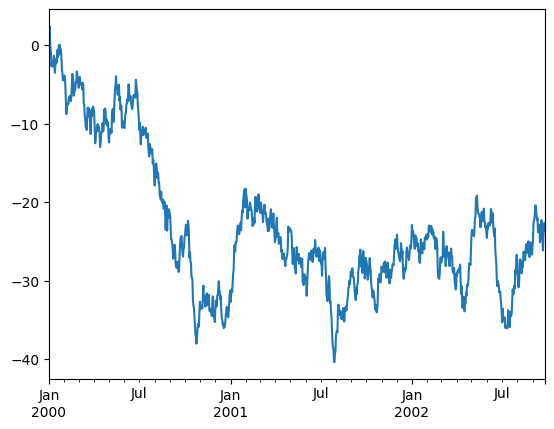

In [132]:
ts.plot()

On DataFrame, plot() is a convenience to plot all of the columns with labels:

In [133]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])

In [134]:
df = df.cumsum()

<Figure size 640x480 with 0 Axes>

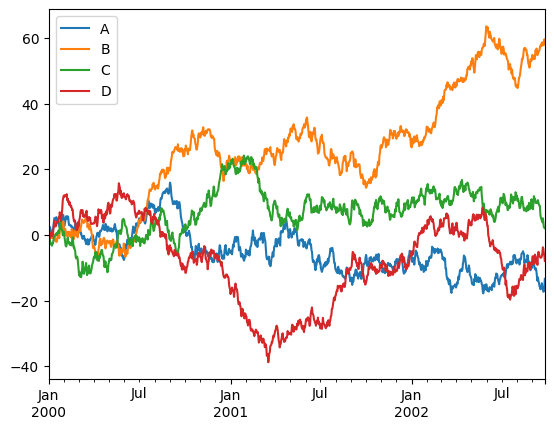

In [135]:
plt.figure(); df.plot(); plt.legend(loc='best')

## Getting Data In/Out

### CSV
[Writing to a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-store-in-csv)

In [136]:
df.to_csv('foo.csv')

[Reading from a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-read-csv-table)

In [137]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,2.171120,-0.586808,-1.260982,-1.303673
1,2000-01-02,0.599011,0.887655,-0.905785,-1.256348
2,2000-01-03,2.482732,0.734742,-1.531644,-0.990851
3,2000-01-04,2.011765,-0.916212,-2.093859,-0.264433
4,2000-01-05,1.223325,-0.141307,-2.684446,0.594883
...,...,...,...,...,...
995,2002-09-22,-15.971778,58.596496,5.101836,-3.700089
996,2002-09-23,-17.257298,58.227137,3.751251,-4.259605
997,2002-09-24,-17.106209,57.836776,2.394687,-5.585688
998,2002-09-25,-15.969733,59.601129,2.207183,-6.333981


### HDF5
Reading and writing to [HDFStores](http://pandas.pydata.org/pandas-docs/stable/io.html#io-hdf5)

Writing to a HDF5 Store

In [138]:
df.to_hdf('foo.h5','df')

Reading from a HDF5 Store

In [139]:
pd.read_hdf('foo.h5','df')

,A,B,C,D
2000-01-01,2.171120,-0.586808,-1.260982,-1.303673
2000-01-02,0.599011,0.887655,-0.905785,-1.256348
2000-01-03,2.482732,0.734742,-1.531644,-0.990851
2000-01-04,2.011765,-0.916212,-2.093859,-0.264433
2000-01-05,1.223325,-0.141307,-2.684446,0.594883
...,...,...,...,...
2002-09-22,-15.971778,58.596496,5.101836,-3.700089
2002-09-23,-17.257298,58.227137,3.751251,-4.259605
2002-09-24,-17.106209,57.836776,2.394687,-5.585688
2002-09-25,-15.969733,59.601129,2.207183,-6.333981


### Excel

Reading and writing to [MS Excel](http://pandas.pydata.org/pandas-docs/stable/io.html#io-excel)

Writing to an excel file

In [140]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

Reading from an excel file

In [141]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2000-01-01,2.171120,-0.586808,-1.260982,-1.303673
1,2000-01-02,0.599011,0.887655,-0.905785,-1.256348
2,2000-01-03,2.482732,0.734742,-1.531644,-0.990851
3,2000-01-04,2.011765,-0.916212,-2.093859,-0.264433
4,2000-01-05,1.223325,-0.141307,-2.684446,0.594883
...,...,...,...,...,...
995,2002-09-22,-15.971778,58.596496,5.101836,-3.700089
996,2002-09-23,-17.257298,58.227137,3.751251,-4.259605
997,2002-09-24,-17.106209,57.836776,2.394687,-5.585688
998,2002-09-25,-15.969733,59.601129,2.207183,-6.333981
